#HW3　Monte Carlo control algorithm

1. deadline on 10/27
2. Upload HW3_name.ipynb and HW3_name.pdf to eeclass->homework.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
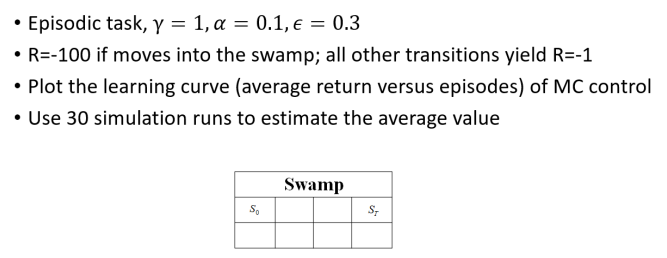

In [81]:
# left, up, right, down
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]

epsilon = 0.3
alp=0.1
r=1
st=[1,3]
s0=[1,0]
q = np.zeros((3,4,4))

In [82]:
# Maintain state with list datatype.
def step(state, action):
  swamp = [[0,0],[0,1],[0,2],[0,3]]
  state_n=(state+ACTIONS[action]).tolist()
  if state_n in swamp:
    return state_n,-100
  if state_n[0]<0 or state_n[1]<0 or state_n[0]>2 or state_n[1]>3:
    if state in swamp:
      return state,-100
    return state,-1
  return state_n, -1

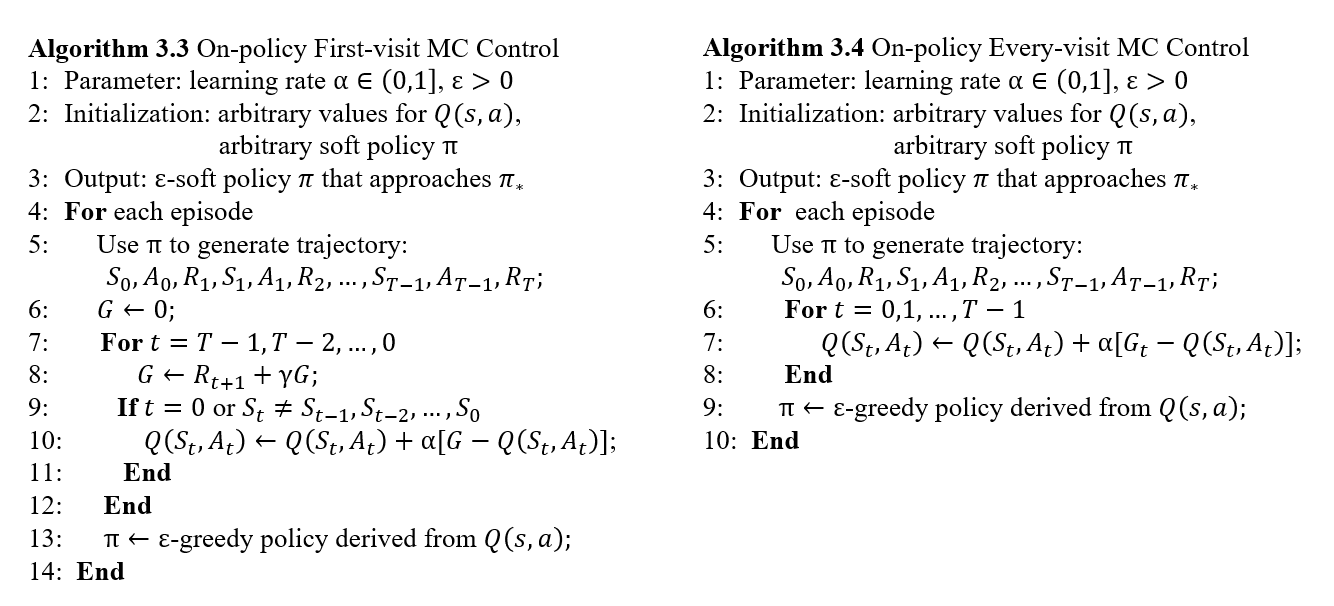

In [83]:
def epsilon_greedy(q,s,epsilon):
  if rd.random()<epsilon:
    return rd.randint(0,4)
  else:
   
    return np.argmax(q[s[0],s[1],:])

def episode_first():
  T=0
  returns = 0
  tra = []
  states =[s0]
  state=s0
  while np.array_equal(state,st)==False:
    action=epsilon_greedy(q,state,epsilon)
    states.append(state)
    state_next,reward=step(state,action)
    tra.append([state,action,state_next,reward])
    T = len(tra)
    G=0
    state = state_next
  for i in range(T-1,0,-1):
      G=tra[i][3]+r*G
      returns+= tra[i][3]
      if i !=0 :
        if states[i] not in states[0:i-1]:
          q[tra[i][0][0],tra[i][0][1],tra[i][1]]=q[tra[i][0][0],tra[i][0][1]\
          ,tra[i][1]]+alp*(G-q[tra[i][0][0],tra[i][0][1],tra[i][1]])
  return returns

def episode_every():
  T=0
  returns = 0
  tra = []
  rewards = []
  states =[s0]
  action_list=[]
  state = s0
  while np.array_equal(state,st)==False:
    action = epsilon_greedy(q,state,epsilon)
    states.append(state)
    state_next,reward=step(state,action)
    tra.append([state,action,state,reward])
    T = len(tra)
    G=0
    state=state_next
  for i in range(0,T-1):
    returns+=tra[i][3]
    for j in range(i,T-1):
      G=tra[i][3]+r*G
    q[tra[i][0][0],tra[i][0][1],tra[i][1]]=q[tra[i][0][0],tra[i][0][1]\
      ,tra[i][1]]+alp*(G-q[tra[i][0][0],tra[i][0][1],tra[i][1]])
    G=0  
  return returns

# Result(60%):

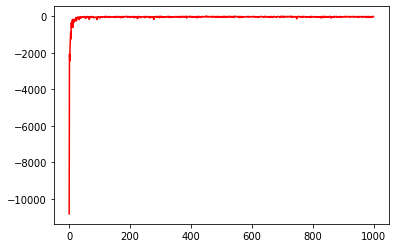

In [84]:
# use 30 simulation, 1000 episode per simulation.
import matplotlib.pyplot as plt
y=[]
for j in range(30):
  q = np.zeros((3,4,4))
  y.append([episode_first() for i in range(1000)])
result = np.mean(y,axis=0)
plt.plot(np.array([i for i in range(len(y[0]))]),result,color = 'r')
plt.show()


#Experiments and Analysis(40%)

1. Plot the q_values in your result.(20%)
2. Whether q_values are reasonable? Explain your result.(10%)
2. Transfer state-action values to state values and plot it.(10%) 



In [109]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.table import Table
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(4):
    for j in range(3):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')
  
  from google.colab import files #google.colab only
  plt.savefig("2.png")
  files.download("2.png") #google.colab only


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

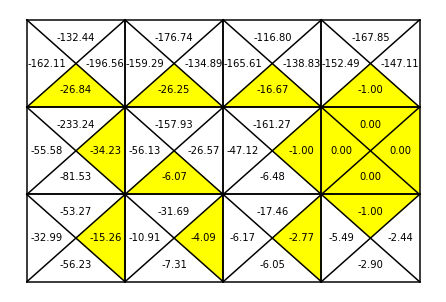

In [151]:
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
q = rd.rand(3,4,4)
q[1,3,:] =np.zeros(4)
for i in range(50000):
    episode_first()

drawTable(q)

In [116]:
def epsilon_greedy_v(v,s,epsilon):
  if rd.random()<epsilon:
    return rd.randint(0,4)
  else:
    next_s=[ step(s,i)[0] for i in range(4)]
    return np.argmax([v[s_[0],s_[1]]+ r*step(s_,i)[1] for i,s_ in enumerate(next_s)])
def episode_first_state_value(v):
  T=0
  returns = 0
  tra = []
  states =[s0]
  state = s0
  while np.array_equal(state,st)==False:
    action=epsilon_greedy_v(v,state,epsilon)
    states.append(state)
    state_next,reward=step(state,action)
    tra.append([state,action,state_next,reward])
    T=len(tra)
    G=0
    state=state_next
  for i in range(T-1,0,-1):
    G=tra[i][3]+r*G
    returns+=tra[i][3]
    if states[i] not in states[0:i-1]:
      v[tra[i][0][0],tra[i][0][1]]=v[tra[i][0][0],tra[i][0][1]]\
      +alp*(G-v[tra[i][0][0],tra[i][0][1]])
  return returns

def episode_every_state_value(v):
  T=0
  returns = 0
  tra = []
  rewards = []
  states =[s0]
  action_list=[]
  state = s0
  while np.array_equal(state,st)==False:
    action=epsilon_greedy_v(v,state,epsilon)
    states.append(state)
    state_next,reward=step(state,action)
    tra.append([state,action,state_next,reward])
    T = len(tra)
    G=0
    state=state_next
  for i in range(0,T-1):
      returns+=tra[i][3]
      for j in range(i,T-1):
        G=tra[j][3]+r*G
      v[tra[i][0][0],tra[i][0][1]]=v[tra[i][0][0],tra[i][0][1]]\
      +alp*(G-v[tra[i][0][0],tra[i][0][1]])
      G=0
  return returns



In [98]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    #Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text=val, 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(np.shape(image)[0])):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(np.shape(image)[1])):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

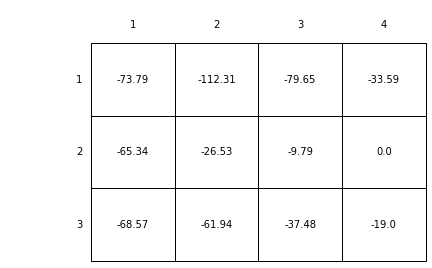

In [145]:
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]

v = rd.rand(3,4)
v[1,3]=0
for i in range(50000):
  episode_first_state_value(v)
draw_image(np.round(v, decimals=2))
from google.colab import files #google.colab only
plt.savefig("3.png")
files.download("3.png") #google.colab only
